# <font color='blue'>SME0241 - Introdução à Modelagem Matemática</font>

## Segundo Trabalho Entregável 05/12/2023

## Prof. Luis Gustavo Nonato  

ICMC-USP

----

## <font color='blue'> Instruções para o Trabalho Entregável 2</font>
<font color='blue'> Os seguintes passos devem ser seguidos para realizar e entregar do segundo trabalho:

1. Baixe e renomeie o notebook `SME241_trabalho_2.ipynb` com seu nome e número USP
2. Uma vez que tenha concluído o trablaho, faça upload do notebook (renomeado) no diretório `Entrega dos Trabalhos/Trabalho 2`

Em todas as questões abaixo você precisa marcar a alternariva correta e também incluir o código Python que calcula a resposta da questão. Para marcar a alternativa que julgue correta, inclua um sinal (X) na frente da mesma. Por exemplo:

a) 123<br>
b) 234 (X)<br>
c) 345<br>
d) 456

</font>

<font color='red'> Não esqueça de renomear o arquivo com seu nome e número USP antes de fazer upload no Drive. <br><br>Por exemplo: <br><br> **Gustavo_Nonato_3223813.ipynb** <br><br> Insira também seu nome e número USP na célula abaixo.</font>

---

**Nome**: Amanda Araujo Silva

**No USP**: 10260441

In [163]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Questão 1: (5 pontos)
A função abaixo carrega o arquivo ``qualidade_ar_dia.csv``(enviado por email juntamente com o notebook) e retorna uma série com medidas diárias do número de particulas no ar em um ponto da cidade de São Paulo no período de 1 ano.

In [164]:
def read_particulas():
    qar = pd.read_csv('qualidade_ar_dia.csv')
    q = qar['Particulas Inalaveis'].values
    return(q)

#### 1.1) (0.5 ponto)
Faça o gráfico do número de partículas utilizando como discretização no eixo $x$ pontos igualmente espaçados no intervalo $[0,2\pi]$.

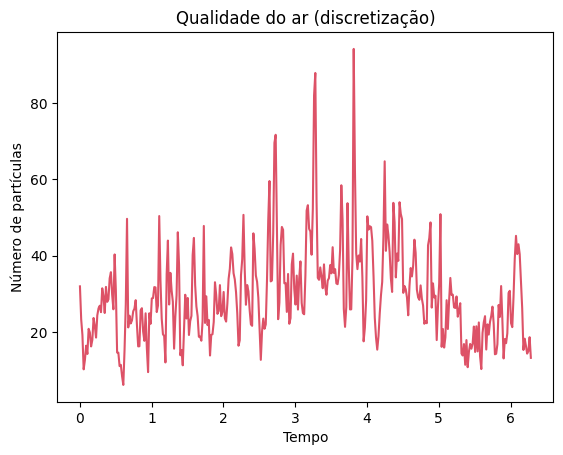

In [165]:
# Solução
q = read_particulas()

# plt.plot(q, c='#76b5c5')
# plt.xlabel('Tempo (dias)')
# plt.ylabel('Número de partículas')
# plt.title('Qualidade do ar')
# plt.show()

# Discretização eixo x: intervalo [0, 2pi] - domínio temporal
t = np.linspace(0, 2*np.pi, len(q))
plt.plot(t, q, color='#dd5267')
plt.xlabel('Tempo')
plt.ylabel('Número de partículas')
plt.title('Qualidade do ar (discretização)')
plt.show()

#### 1.2) (3 pontos)
Considere a função

$$
f(t)=a_0+a_1\cos(t)+a_2\sin(t)+a_3\cos(2t)+a_4\sin(2t)
$$

como modelo para a distribuição das partículas dadas no exercício anterior. Encontre os valores de $a_0,a_1,a_2,a_3$ e $a_4$ de modo a minimizar $\sum_i\|f(t_i)-Q(t_i)\|$, onde $Q(t_i)$ é o número de partículas no ponto $t_i\in [0,2\pi]$.

Qual o erro médio quadrático da aproximação gerada?

a) 300.1<br>
b) 200.9<br>
c) 110.6 (X)<br>
d) 90.6

> Temos um modelo proposto por f(t) linear nos parâmetros (a0, a1, a2, a3 e a4), logo é possível empregar o **método de mínimos quadrados** para encontrar os melhores valores para os parâmetros, de modo a minimizar o erro médio quadrado.

> Implementação comptacional:
1.   Obtenção dos dados
2.   Montagem matriz design: A (nº entradas x nº parâmetros)
3.   Calcular: A.T * A
4.   Resolver o sistema: (A.T*A) alpha = A.T y $→$ Equação normal

> Erro médio quadrático: $\frac{1}{N} \sum^N (yestimado_i - yreal_i)^2$


In [166]:
# Solução

# Obtenção dos dados
q = read_particulas()             # y: valor real
t = np.linspace(0, 2*np.pi, len(q)) # discretização domínio temporal: intervalo [0, 2pi]; 365 dias

# Matriz de design A: 1, cos(t), sen(t), cos(2t), sen(2t)
A = np.zeros((len(q), 5))
A[:, 0] = 1
A[:, 1] = np.cos(t) # cos(t)
A[:, 2] = np.sin(t) # sen(t)
A[:, 3] = np.cos(2*t) # cos(2t)
A[:, 4] = np.sin(2*t) # sen(2t)
#print(A)

# Resolução do sistema: Equação normal (A.T*A) alpha = (A.T) y
AtA = np.dot(A.T, A)
alpha = np.linalg.solve(AtA, np.dot(A.T, q)) # parâmetros do modelo

print('Parâmetros do modelo dado por f(t):')
print(alpha)

Parâmetros do modelo dado por f(t):
[29.85174778 -8.48851977 -2.39920826  0.81780808  2.75246336]


In [167]:
# Erro médio quadrático
def erromedioquadratico(y_estimativa, y_real):
  '''
  Cálculo do erro médio quadrático, dado pela média da soma do quadrado das
  diferenças entre o valor real e o estimado.
  '''
  erro = 0
  for y, y_hat in zip(y_real, y_estimativa):
    erro += (y_hat - y)**2
  erro = erro/len(y_real)

  return erro

In [168]:
# Aproximação dada pelo modelo: f(t) = a0 + a1*cos(t) + a2*sen(t) + a3*cos(2t) + a4*sen(2t)
modelo = np.zeros(len(q))
for i in range(len(q)):
  modelo[i] = alpha[0] + alpha[1]*np.cos(t[i]) + alpha[2]*np.sin(t[i]) + alpha[3]*np.cos(2*t[i]) + alpha[4]*np.sin(2*t[i])

print('Erro médio quadrático da aproximação por f(t):')
print(erromedioquadratico(modelo, q))

Erro médio quadrático da aproximação por f(t):
110.63609500425935


> Jeito mais eficiente de calcular o erro: usar que já foi calculado e explorar o que significa a forma matricial (!)

In [170]:
# Aproximação dada pelo modelo: f(t)
hat = np.dot(A, alpha)
print('Erro médio quadrático da aproximação por f(t):')
print(erromedioquadratico(hat, q))

Erro médio quadrático da aproximação por f(t):
110.63609500425935


#### 1.3) (1.5 pontos)
Faça o gráfico do número de particulas juntamente com o gráfico do modelo encontrado na questão 1.2) acima.

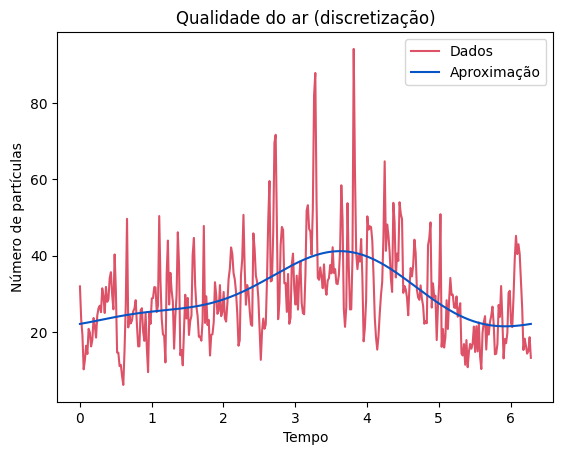

In [172]:
# Solução
plt.plot(t, q, color='#dd5267')
plt.plot(t, modelo, color='#0854c4')
#plt.plot(t, hat, color='r')

plt.xlabel('Tempo')
plt.ylabel('Número de partículas')
plt.title('Qualidade do ar (discretização)')
plt.legend(['Dados', 'Aproximação'])
plt.show()

### Questão 2) (5 pontos)
Considere a função $f(x,y)=x^2+16y^2+x$.

#### 2.1) (1 ponto)
Escreva um código para desenhar as curvas de nível 2, 4, 6 e 8 da função $f(x,y)$ acima.

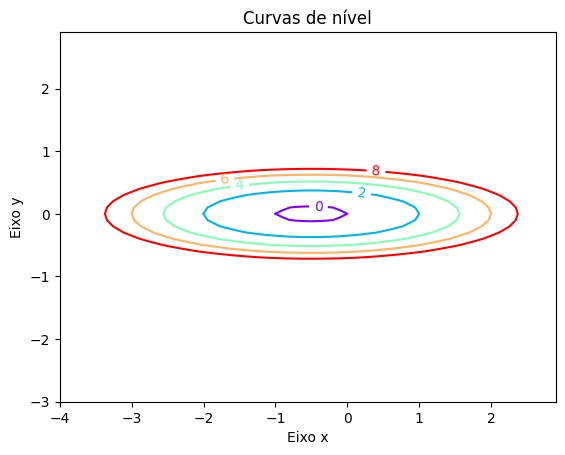

In [173]:
# Solução
niveis = [0, 2, 4, 6, 8]

feature_x = np.arange(-4, 3, 0.1) # discretização em x
feature_y = np.arange(-3, 3, 0.1) # discretização em y
[X, Y] = np.meshgrid(feature_x, feature_y)
Z = X**2 + 16*Y**2 + X # função

# Basic contour plot: curvas de nível
fig, ax = plt.subplots(1, 1)
CS = ax.contour(X, Y, Z, niveis, cmap='rainbow')

ax.clabel(CS, CS.levels, inline=True, fontsize=10)
ax.set_title('Curvas de nível')
ax.set_xlabel('Eixo x')
ax.set_ylabel('Eixo y')

plt.show()

#### 2.2) (2.5 pontos)
Encontre o ponto onde a curva $xy=1$ é tangente a uma das curvas de nível de $f(x,y)$? Utilize como chute inicial o ponto $x_0=[2,1,1]$. O ponto encontrado é:

a) [1.88,0.53] (X)<br>
b) [2.11,0.67] <br>
c) [-2.53,0.5]<br>
d) [-2,-1]

> Solução: **Método dos Multiplicadores de Lagrange**

Funções dadas:
*   $f(x, y) = x^2 + 16y^2 + x$
*   $g(x, y) = xy - 1 = 0$; restrição

Método multiplicadores de Lagrange:
*   $F(x, y, λ) = f(x, y) - λg(x, y)$
*   $grad F = \nabla F(x, y, λ) = 0$

dando origem ao seguinte sistema de equações:

> $2x + 1 - \lambda y = 0$; $h_1$

> $32y - \lambda x = 0$; $h_2$

> $xy - 1 = 0$; $h_3$

Para resolver o sistema (não-linear), uso do **método de Newton**:

1.   Construção de $H$: $[h_1, h_2, h_3]$ (matriz coluna 3 x 1)
2.   Jacobiana de $H(x, y, λ)$:
$$
J_H =
\begin{bmatrix}
2 & - \lambda & -y \\
- \lambda & 32 & -x \\
y & x & 0
\end{bmatrix}
$$
3.   Resolução: $J_H(X^*) ΔX = - H(X^*)$
4.   Iteração: $X_{i + 1} = X_i + \Delta X$



In [174]:
# Solucao
# Método multiplicadores de Lagrange + Método de Newton

def Newton(X_inicial):

  n = 100  # nº de iterações

  X = np.zeros(3)  # X[0] = x, X[1] = y, X[2] = lambda
  X = X_inicial    # condições iniciais

  for i in range(n):
    # Sistema resultante método multiplicadores de Lagrange
    h1 = 2*X[0] + 1 - X[2]*X[1]  # 2x + 1 - lambda y
    h2 = 32*X[1] - X[2]*X[0]     # 32y - lambda x
    h3 = X[0]*X[1] - 1           # xy - 1

    # Método de Newton
    H = np.zeros(3)
    H[:] = [h1, h2, h3]

    J = np.asarray([[2, -X[2], -X[1]],   # jacobiana
                    [-X[2], 32, -X[0]],
                    [X[1], X[0], 0]])

    dX = np.linalg.solve(J, -H)
    X += dX

  return X

In [175]:
Xo = [2, 1, 1]  # condição inicial
X = Newton(Xo)

print('Ponto (x, y) = (' + str(round(X[0], 3)) + ', ' + str(round(X[1], 3)) + ')')

Ponto (x, y) = (1.886, 0.53)


#### 2.3) (1.5 ponto)
Faça o gráfico da curva curva $xy=1$ e da curva de nível de $f(x,y)$ que é tangente a ela calculada no exercício anterior, destacando o ponto de tangência. O valor da curva de nível é:

a) 7.38 <br>
b) 8.10 <br>
c) 9.94 (X) <br>
d) 10.51

In [176]:
# Curva de nível: ponto de tangência
CN = X[0]**2 + 16*X[1]**2 + X[0] # f(x, y)

print('Valor da curva de nível: ' + str(round(CN, 2)))

Valor da curva de nível: 9.94


Condição inicial: [2, 1, 1]
Valor da curva de nível: 9.94


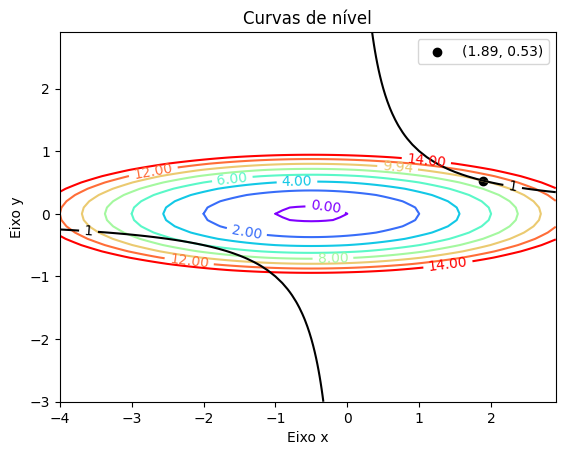

In [177]:
#Solucao
Xo = [2, 1, 1]  # condição inicial
print('Condição inicial:', Xo)
X = Newton(Xo)

# Ponto de tangência
xT = X[0]
yT = X[1]

# Curva de nível: ponto de tangência
CN = X[0]**2 + 16*X[1]**2 + X[0] # f(x, y)

print('Valor da curva de nível: ' + str(round(CN, 2)))

niveis = [0, 2, 4, 6, 8, CN, 12, 14]
niveis_g = [1]

feature_x = np.arange(-4, 3, 0.1) # discretização em x
feature_y = np.arange(-3, 3, 0.1) # discretização em y
[X, Y] = np.meshgrid(feature_x, feature_y)
Z = X**2 + 16*Y**2 + X # função f(x, y)
G = X*Y            # função g(x, y)

# Basic contour plot: curvas de nível
fig, ax = plt.subplots(1, 1)
CS = ax.contour(X, Y, Z, niveis, cmap='rainbow')
ax.clabel(CS, CS.levels, inline=True, fontsize=10)

# Função g(x, y) = xy - 1
CS = ax.contour(X, Y, G, niveis_g, cmap='gray')
ax.clabel(CS, CS.levels, inline=True, fontsize=10)

# Ponto de tangência
plt.scatter(xT, yT, c='black')

ax.set_title('Curvas de nível')
ax.set_xlabel('Eixo x')
ax.set_ylabel('Eixo y')
ax.legend(['(' + str(round(xT, 2)) + ', ' + str(round(yT, 2)) + ')'])

plt.show()

> Explorando outras condições iniciais...

Condição inicial: [-2, -2, 1]
Valor da curva de nível: 5.93


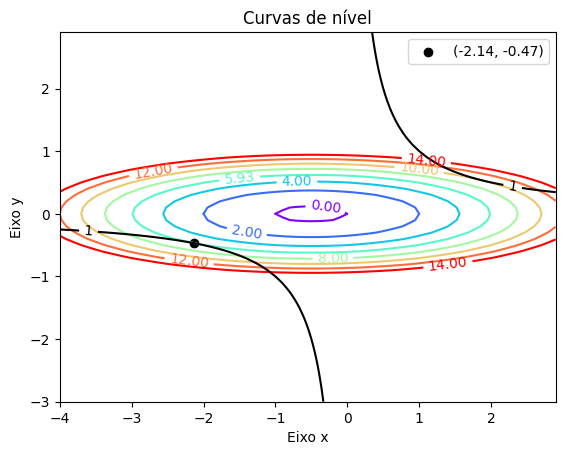

In [178]:
#Explorando outras condições iniciais
Xo = [-2, -2, 1]  # condição inicial
print('Condição inicial:', Xo)
X = Newton(Xo)

# Curva de nível: ponto de tangência
CN = X[0]**2 + 16*X[1]**2 + X[0] # f(x, y)

print('Valor da curva de nível: ' + str(round(CN, 2)))

# Ponto de tangência
xT = X[0]
yT = X[1]

niveis = [0, 2, 4, CN, 8, 10, 12, 14]
niveis_g = [1]

feature_x = np.arange(-4, 3, 0.1) # discretização em x
feature_y = np.arange(-3, 3, 0.1) # discretização em y
[X, Y] = np.meshgrid(feature_x, feature_y)
Z = X**2 + 16*Y**2 + X # função f(x, y)
G = X*Y            # função g(x, y)

# Basic contour plot: curvas de nível
fig, ax = plt.subplots(1, 1)
CS = ax.contour(X, Y, Z, niveis, cmap='rainbow')
ax.clabel(CS, CS.levels, inline=True, fontsize=10)

# Função g(x, y) = xy - 1
CS = ax.contour(X, Y, G, niveis_g, cmap='gray')
ax.clabel(CS, CS.levels, inline=True, fontsize=10)

# Ponto de tangência
plt.scatter(xT, yT, c='black')

ax.set_title('Curvas de nível')
ax.set_xlabel('Eixo x')
ax.set_ylabel('Eixo y')
ax.legend(['(' + str(round(xT, 2)) + ', ' + str(round(yT, 2)) + ')'])

plt.show()

> Observa-se que alterando a condição inicial é possível chegar a um resultado final para o ponto de tangência entre as funções dadas distinto.